In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 8s 2us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

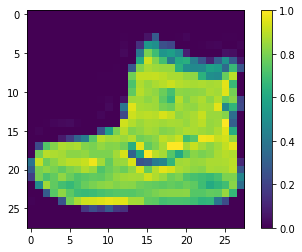

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

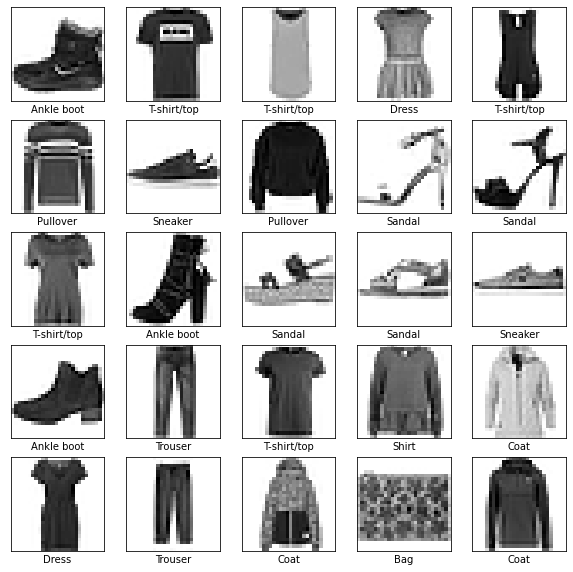

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4963 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3739 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3342 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3119 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2915 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2796 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2667 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2564 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2480 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Test accuracy: ", test_acc)

313/313 - 1s - loss: 0.3334 - accuracy: 0.8846
Test accuracy:  0.8845999836921692


In [21]:
probability_model = tf.keras.Sequential([
    model, tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)

In [23]:
predictions[0]

array([1.7552262e-06, 3.8027004e-09, 4.4187018e-10, 1.5748583e-13,
       7.5536928e-09, 3.4714332e-03, 9.8547099e-09, 1.9492686e-02,
       5.5504636e-09, 9.7703415e-01], dtype=float32)

In [24]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [28]:
def plot_item_vs_plot(i):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()

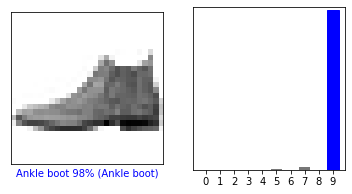

In [29]:
plot_item_vs_plot(0)

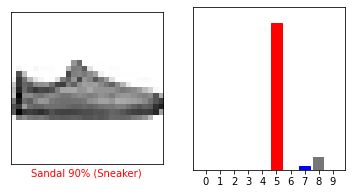

In [30]:
plot_item_vs_plot(12)

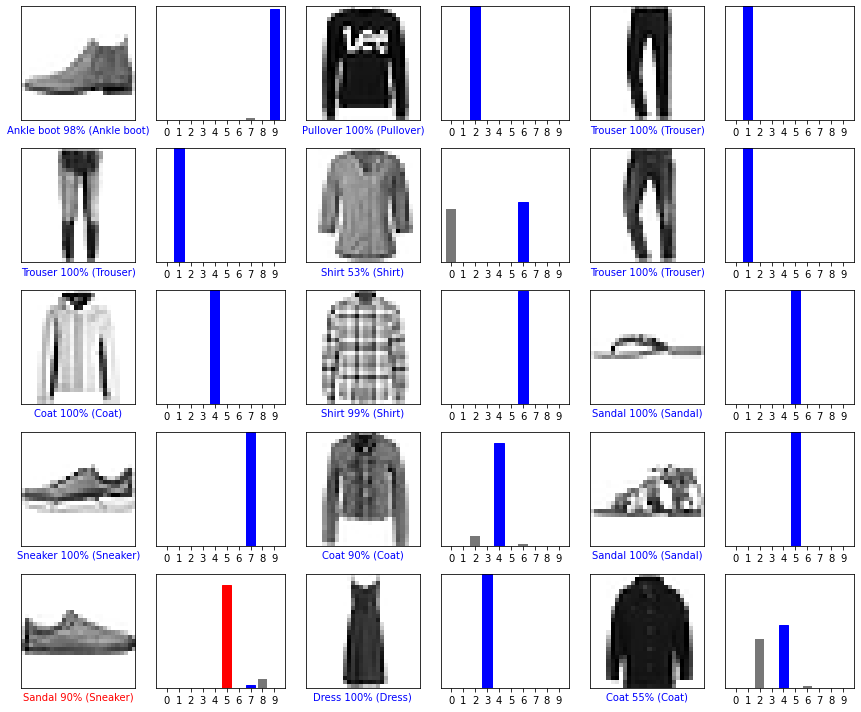

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [32]:
img = test_images[1]

In [33]:
img = np.expand_dims(img,0)

In [34]:
predictions_single = probability_model.predict(img)
class_names[np.argmax(predictions_single)]

'Pullover'

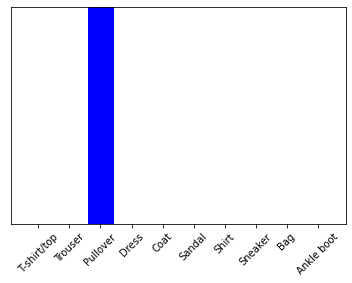

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()